# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, cohen_kappa_score, f1_score, recall_score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [2]:
df = pd.read_csv("creditcard.csv")
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

## Class distribution & Checking the Imbalance in the Data

In [3]:
print(df["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [4]:
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


Nous avons obtenu une dataset de taille : 284 807 observations et 31 variables. 
Sur les 284 807 transactions, nous avons eu 492 fraudes.


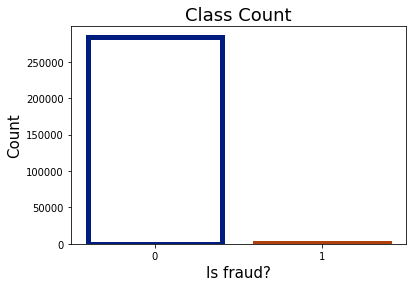

In [5]:
sns.countplot(df['Class'],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), label = "Count")
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [6]:
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403


In [7]:
df = df.drop(columns = ['Amount', 'Time'], axis=1)

### Le jeu de données (Credit card) contient les transactions effectuées par cartes de crédit par les titulaires de carte européennes. Cet ensemble de données présente des transactions, où nous avons eu 492 fraudes sur 284 807 transactions. 
### L'ensemble de données est très déséquilibré, les classes positives (fraudes) représentent 0,172% de toutes les transactions. Il contient uniquement des variables d'entrée numériques résultant d'une transformation PCA. Les caractéristiques V1, V2, ... V28 sont les composantes principales obtenues avec PCA, les seules caractéristiques qui n'ont pas été transformées avec PCA sont 'Time' et 'Amount'. 
### La variable 'Time' contient les secondes écoulées entre chaque transaction et la première transaction de l'ensemble de données.
### La variable 'Amount' est le Montant de la transaction, cette caractéristique peut être utilisée pour l'apprentissage sensible aux coûts dépendant de l'exemple.
### La fonction 'Class' est la variable de réponse et prend la valeur 1 en cas de fraude et 0 sinon. Compte tenu du rapport de déséquilibre de classes, nous recommandons de mesurer la précision en utilisant l'aire sous la courbe de rappel de précision (AUPRC). 
### La précision de la matrice de confusion n'est pas significative pour une classification non équilibrée.


## Data PreProcessing

In [8]:
X= df.drop(['Class'], axis=1)
#print(X)
y= df['Class']
#print(y)

## Train-Test Split

La fonction train_test_split utilise un randomiseur pour séparer les données en ensembles d'apprentissage et de test. 70% des données concernent l'ensemble d'apprentrissage et 30% 'enseble de test'

In [9]:
# Découpage des données en train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

La fonction RunModel prend en entrée le modèle non entrainé ainsi que toutes les données de test et de train, y compris les labels.
Elle entrain le modèle, exécute la prédiction à l'aide des données de test et renvoie la matrice de confusion avec les étiquettes prédites

In [10]:
def RunModel(model, X_train, y_train, X_test, y_test):
   model.fit(X_train, y_train.values.ravel())
   pred = model.predict(X_test)
   matrix = confusion_matrix(y_test, pred)
   return matrix, pred

PrintStats prend comme paramètres une matrice de confusion, des labels de test et des labels de prédiction et effectue les opérations suivantes:
- Sépare la matrice de confusion en ses parties constituantes.
- Calcule les scores F1, Recall, Accuracy et Cohen Kappa.
- Imprime la matrice de confusion et tous les scores calculés.

In [11]:
def PrintStats(cmat, y_test, pred):
   # separate out the confusion matrix components
   tpos = cmat[0][0]
   fneg = cmat[1][1]
   fpos = cmat[0][1]
   tneg = cmat[1][0]
   # calculate F!, Recall scores
   f1Score = round(f1_score(y_test, pred), 2)
   recallScore = round(recall_score(y_test, pred), 2)
   # calculate and display metrics
   print(cmat)
   print( 'Accuracy: '+ str(np.round(100*float(tpos+fneg)/float(tpos+fneg + fpos + tneg),2))+'%')
   print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, pred),3)))
   print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = recallScore))
   print("F1 Score for Model : {f1_score}".format(f1_score = f1Score))

Nous choisissons une technique d'apprentissage automatique (un modèle).
La régression logistique est peut-être la technique d'apprentissage automatique à deux classes la plus courante. Nous l'utiliserons pour ce premier test:

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

c:\users\rihab\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[85295    12]
 [   51    85]]
Accuracy: 99.93%
Cohen Kappa: 0.729
Sensitivity/Recall for Model : 0.62
F1 Score for Model : 0.73


Nous avons obtenu 99,93% de ses prédictions correctes. 
Mais si nous regardons la matrices de confusions, nous remarquons que:
- 85295 transactions ont été classées comme valides qui étaient réellement valides
- 12 transactions ont été classées comme fraude réellement valide 
- 51 transactions ont été classées comme valides qui étaient des fraudes
- 85 transactions ont été classées comme fraude qui étaient de la fraude
Ainsi, bien que la précision soit excellente, nous constatons que l'algorithme a mal classé plus de 3 transactions frauduleuses sur 10

En fait, si notre algorithme classait tout simplement comme valide, il aurait une précision meilleure que 99,9% mais serait totalement inutile!
La précision n'est donc pas la mesure fiable de l'efficacité d'un modèle.
Au lieu de cela, nous examinons d'autres mesures comme le score de Cohen Kappa, Recall et F1.
Dans chaque cas, nous voulons obtenir un score aussi proche de 1 que possible.


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
cmat, pred = RunModel(dt, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

[[85287    20]
 [   27   109]]
Accuracy: 99.94%
Cohen Kappa: 0.822
Sensitivity/Recall for Model : 0.8
F1 Score for Model : 0.82


Nous avons obtenu 99.94% de prédiction correcte avec un score de 0.82

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
cmat, pred = RunModel(KNN, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

[[85298     9]
 [   29   107]]
Accuracy: 99.96%
Cohen Kappa: 0.849
Sensitivity/Recall for Model : 0.79
F1 Score for Model : 0.85


Nous avons obtenu 99.96% de prédiction correcte avec un score de 0.85

In [15]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
cmat, pred = RunModel(svc, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

[[85300     7]
 [   48    88]]
Accuracy: 99.94%
Cohen Kappa: 0.762
Sensitivity/Recall for Model : 0.65
F1 Score for Model : 0.76


Nous avons obtenu 99.94% de prédiction correcte avec un score de 0.76

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, n_jobs =4)
cmat, pred = RunModel(rf, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

[[85298     9]
 [   26   110]]
Accuracy: 99.96%
Cohen Kappa: 0.863
Sensitivity/Recall for Model : 0.81
F1 Score for Model : 0.86


C’est un peu mieux.
Notons que la précision a légèrement augmenté, aussi les autres scores ont également montré des améliorations significatives. 
Ainsi, une façon d'améliorer notre détection est d'essayer différents modèles et de voir comment ils fonctionnent.
Changer clairement les modèles a aidé. Mais il y a aussi d'autres options. L'une consiste à suréchantillonner l'échantillon de dossiers de fraude ou, à l'inverse, à sous-échantillonner l'échantillon de bons dossiers. Le suréchantillonnage signifie ajouter des dossiers de fraude à notre échantillon de formation, augmentant ainsi la proportion globale des dossiers de fraude. À l'inverse, le sous-échantillonnage supprime des enregistrements valides de l'échantillon, ce qui a le même effet. La modification de l'échantillonnage rend l'algorithme plus «sensible» aux transactions frauduleuses.

#### Pour plier au problématique des classes déséquilibrées, nous allons utiliser des méthodes de re-échantillonnage. 
#### Nous avons utilisé plusieurs méthodes under-sampling et over-sampling, mais la méthode SMOTE nous a procuré les meilleures performances. 
#### L’idée de SMOTE est d’augmenter le rappel pour la classe minoritaire en générant des individus synthétiques. 


In [17]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_sample(X, y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

1    284315
0    284315
Name: 0, dtype: int64

In [18]:
X_train_smote,X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote, test_size=0.3, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, n_jobs =4)
cmat, pred = RunModel(rf, X_train_smote, y_train_smote, X_test_smote, y_test_smote)
PrintStats(cmat, y_test_smote, pred)

[[85127    22]
 [    0 85440]]
Accuracy: 99.99%
Cohen Kappa: 1.0
Sensitivity/Recall for Model : 1.0
F1 Score for Model : 1.0


### ➢ Nous remarquons que la meilleur méthode et le meilleur algorithme pour notre jeu de données est le classifeur RandomForestClassifier avec la méthode smote.
### ➢ L’utilisation de SMOTE noua a permis d’éviter le sur-apprentissage présent dans les autres méthodes de re-échantillonnage.
### ➢ L’étude exploratoire sur les données a été bénéfique parce qu’elle nous a détecté la présence de variables non pertinentes et la déséquilibration des classes.